In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import time

import collections
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# all the known virus miRNAs are used as positive examples
features_virus_mirnas = pd.read_csv('/content/drive/MyDrive/features_virus_miRNAs.csv')

# The negative set is composed of a random set of hsa hairpin-like sequences 
features_unlabeled_hairpins = pd.read_csv('/content/drive/MyDrive/features_unlabeled_hairpins.csv') # Hairpins from hsa genome

In [ ]:
features_virus_mirnas.drop('sequence_names', inplace=True, axis=1)

In [ ]:
features_virus_mirnas['class'] = 1

In [ ]:
features_unlabeled_hairpins.drop('sequence_names', inplace=True, axis=1)

In [ ]:
features_unlabeled_hairpins['class'] = 0

In [ ]:
da = [features_virus_mirnas, features_unlabeled_hairpins]

In [ ]:
df = pd.concat(da)
df.head()

,nt_proportion0,nt_proportion1,nt_proportion2,nt_proportion3,dinucleotide_proportion0,dinucleotide_proportion1,dinucleotide_proportion2,dinucleotide_proportion3,dinucleotide_proportion4,dinucleotide_proportion5,...,efe,ensemble_frequency,diversity,mfe_efe_difference,dQ,dG,mfei1,mfei2,mfei4,class
0,0.292308,0.169231,0.200000,0.338462,0.109375,0.015625,0.078125,0.093750,0.062500,0.031250,...,-27.28,0.457857,1.67,0.007385,0.066635,-0.412308,-1.116667,-0.137436,-1.072000,1
1,0.276923,0.215385,0.230769,0.276923,0.125000,0.078125,0.046875,0.031250,0.078125,0.000000,...,-23.95,0.154283,5.77,0.017692,0.228730,-0.350769,-0.786207,-0.116923,-1.036364,1
2,0.242424,0.287879,0.227273,0.242424,0.061538,0.061538,0.061538,0.046154,0.061538,0.138462,...,-27.02,0.426696,2.62,0.007879,0.107199,-0.401515,-0.779412,-0.100379,-1.204545,1
3,0.200000,0.257143,0.300000,0.242857,0.028986,0.057971,0.057971,0.057971,0.057971,0.072464,...,-32.11,0.101080,6.03,0.020143,0.214866,-0.438571,-0.787179,-0.146190,-1.228000,1
4,0.258065,0.193548,0.225806,0.322581,0.098361,0.016393,0.049180,0.081967,0.049180,0.049180,...,-26.28,0.639769,0.94,0.004516,0.040681,-0.419355,-1.000000,-0.139785,-1.238095,1


In [ ]:
df.fillna(value=0, inplace = True)

In [ ]:
df.isnull().sum().max()

0

In [ ]:
df = df.sample(frac=1)

positive_df = df.loc[df['class'] == 1]
negative_df = df.loc[df['class'] == 0][:569]

normal_distributed_df = pd.concat([positive_df, negative_df])

new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,nt_proportion0,nt_proportion1,nt_proportion2,nt_proportion3,dinucleotide_proportion0,dinucleotide_proportion1,dinucleotide_proportion2,dinucleotide_proportion3,dinucleotide_proportion4,dinucleotide_proportion5,...,efe,ensemble_frequency,diversity,mfe_efe_difference,dQ,dG,mfei1,mfei2,mfei4,class
270609,0.393000,0.214000,0.155000,0.238000,0.169000,0.072000,0.096000,0.060000,0.133000,0.012000,...,-15.70,0.104000,10.85,0.017000,0.373000,-0.170000,-0.461000,-0.057000,-0.681,0
838379,0.239000,0.193000,0.229000,0.339000,0.028000,0.046000,0.083000,0.083000,0.046000,0.056000,...,-31.65,0.132000,7.76,0.011000,0.204000,-0.279000,-0.661000,-0.070000,-0.822,0
514,0.263158,0.140351,0.192982,0.403509,0.107143,0.035714,0.000000,0.125000,0.071429,0.017857,...,-22.63,0.583674,1.20,0.005789,0.045986,-0.391228,-1.173684,-0.195614,-1.115,1
327167,0.264000,0.236000,0.208000,0.292000,0.085000,0.056000,0.056000,0.070000,0.042000,0.056000,...,-17.34,0.096000,13.68,0.020000,0.558000,-0.221000,-0.497000,-0.074000,-0.691,0
244,0.172414,0.206897,0.310345,0.310345,0.052632,0.035088,0.052632,0.035088,0.070175,0.035088,...,-26.37,0.150014,3.14,0.020172,0.141012,-0.434483,-0.840000,-0.144828,-1.200,1


In [ ]:
X = new_df.iloc[:,:-1]
y = new_df.iloc[:,73]

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
en = LabelEncoder()
en_y = en.fit_transform(y)

F_y = tf.keras.utils.to_categorical(en_y)

In [ ]:
seed = 7
np.random.seed(seed)
x_train,x_test,y_train,y_test = train_test_split(X,F_y,test_size=0.20,random_state=seed,stratify=en_y,shuffle=True)
st = StandardScaler()
st_xtrain = st.fit_transform(x_train)
st_xtest = st.fit_transform(x_test)

In [ ]:
AN = tf.keras.models.Sequential()
AN.add(tf.keras.layers.Dense(1024, input_dim=73, activation=tf.nn.relu))
AN.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
AN.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
AN.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
AN.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
AN.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
AN.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
AN.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
AN.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
AN.add(tf.keras.layers.Dense(32, activation=tf.nn.relu))
AN.add(tf.keras.layers.Dense(16, activation=tf.nn.relu))
AN.add(tf.keras.layers.Dense(16, activation=tf.nn.relu))
AN.add(tf.keras.layers.Dense(2, activation=tf.nn.sigmoid))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
AN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = AN.fit(st_xtrain, y_train,validation_data=(st_xtest,y_test),epochs=90, batch_size=20)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 910 samples, validate on 228 samples
Epoch 1/90
910/910 [==============================] - 1s 947us/sample - loss: 0.3698 - acc: 0.8544 - val_loss: 0.3251 - val_acc: 0.8947
Epoch 2/90
910/910 [==============================] - 1s 710us/sample - loss: 0.1571 - acc: 0.9374 - val_loss: 0.3771 - val_acc: 0.8860
Epoch 3/90
910/910 [==============================] - 1s 713us/sample - loss: 0.1199 - acc: 0.9610 - val_loss: 0.4340 - val_acc: 0.9123
Epoch 4/90
910/910 [==============================] - 1s 705us/sample - loss: 0.0795 - acc: 0.9742 - val_loss: 0.5216 - val_acc: 0.8991
Epoch 5/90
910/910 [==============================] - 1s 733us/sample - loss: 0.0730 - acc: 0.9681 - val_loss: 0.8594 - val_acc: 0.9035
Epoch 6/90
910/910 [==============================] - 1s 966us/sample - loss: 0.0815 - acc: 0.9736 - val_loss: 0.9525 - val_acc: 0.9167
Epoch 7/90
910/910 [========================

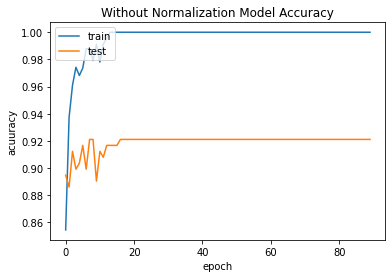

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Without Normalization Model Accuracy')
plt.ylabel('acuuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

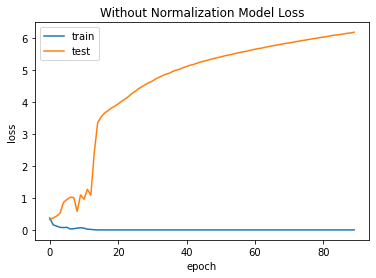

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Without Normalization Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
ownpredictions = AN.predict(st_xtest)

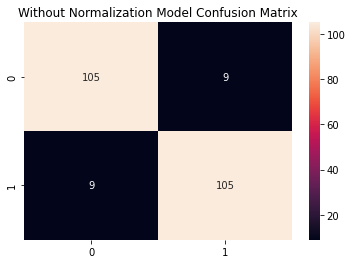

In [ ]:
from sklearn.metrics import confusion_matrix

ocm=confusion_matrix(y_test.argmax(axis=1),ownpredictions.argmax(axis=1))
plt.title('Without Normalization Model Confusion Matrix')
sns.heatmap(ocm,annot=True,fmt="d")

In [ ]:
from sklearn.metrics import matthews_corrcoef,cohen_kappa_score,hamming_loss
from sklearn import metrics
print("matthews_corrcoef",matthews_corrcoef(y_test.argmax(axis=1), ownpredictions.argmax(axis=1)))
print("cohen_kappa_score",cohen_kappa_score(y_test.argmax(axis=1), ownpredictions.argmax(axis=1)))
print("hamming_loss_score",hamming_loss(y_test.argmax(axis=1), ownpredictions.argmax(axis=1)))
print("Precision_score", metrics.precision_score(y_test.argmax(axis=1), ownpredictions.argmax(axis=1)))
print("Pecall_score",metrics.recall_score(y_test.argmax(axis=1), ownpredictions.argmax(axis=1)))
print("F1_score",metrics.f1_score(y_test.argmax(axis=1), ownpredictions.argmax(axis=1)))
print("Accuracy_score",metrics.accuracy_score(y_test.argmax(axis=1), ownpredictions.argmax(axis=1)))
print("Roc_auc_score",metrics.roc_auc_score(y_test.argmax(axis=1),ownpredictions.argmax(axis=1)))
print("Fbeta_score",metrics.fbeta_score(y_test.argmax(axis=1), ownpredictions.argmax(axis=1), beta=0.5))
print("Fbeta_score",metrics.fbeta_score(y_test.argmax(axis=1), ownpredictions.argmax(axis=1), beta=1))
print("Fbeta_score",metrics.fbeta_score(y_test.argmax(axis=1), ownpredictions.argmax(axis=1), beta=2))

matthews_corrcoef 0.8421052631578947
cohen_kappa_score 0.8421052631578947
hamming_loss_score 0.07894736842105263
Precision_score 0.9210526315789473
Pecall_score 0.9210526315789473
F1_score 0.9210526315789473
Accuracy_score 0.9210526315789473
Roc_auc_score 0.9210526315789473
Fbeta_score 0.9210526315789472
Fbeta_score 0.9210526315789473
Fbeta_score 0.9210526315789472
